In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=7,7

In [50]:
import numpy as np
from scikits.audiolab import *

# output one second of stereo gaussian white noise at 48000 hz
play(0.05 * np.random.randn(2, 48000))

NameError: global name 'AlsaDevice' is not defined

In [53]:
import pydub

In [52]:
url ="Yulianna Avdeeva - Chopin 4 Mazurkas, Op. 30-WCI-Zerfj6I.mp3"

#sound = pydub.AudioSegment.from_mp3(url)
#sound.export("/home/jdm/Documents/math/Yulianna Avdeeva - Chopin 4 Mazurkas, Op. 30-WCI-Zerfj6I.wav", format="wav")

In [12]:
import numpy as np
from scikits.audiolab import Format, Sndfile

filename = 'foo.wav'

# Create some data to save as audio data: one second of stereo white noise
data = np.random.randn(48000, 2)

# Create a Sndfile instance for writing wav files @ 48000 Hz
format = Format('wav')
f = Sndfile(filename, 'w', format, 2, 48000)

# Write the first 500 frames of the signal. Note that the write_frames method
# uses tmp's numpy dtype to determine how to write to the file; sndfile also
# converts the data on the fly if necessary
f.write_frames(data[:10000])

f.close()

In [5]:
from scikits.audiolab import Format, Sndfile

# Use 24 bits encoding, big endian
format = Format('wav', 'pcm24', 'big')
f = Sndfile('foo.wav', 'w', format, 2, 48000)

In [1]:
from scikits.audiolab import wavread

data, fs, enc = wavread('/home/jdm/Documents/math/Yulianna Avdeeva - Chopin 4 Mazurkas, Op. 30-WCI-Zerfj6I.wav')

/usr/local/lib/python2.7/dist-packages/scikits/audiolab/soundio/play.py:48: UserWarning: Could not import alsa backend; most probably, you did not have alsa headers when building audiolab
  warnings.warn("Could not import alsa backend; most probably, "


In [2]:
data, fs, enc, data.shape[0]/44100

(array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        ..., 
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]), 44100, 'pcm16', 605)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=12,4

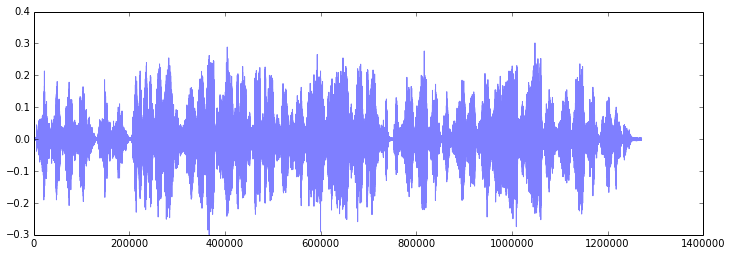

In [4]:
plt.plot(data[::44100/2100,0], 'b-', linewidth=1, alpha=0.5)

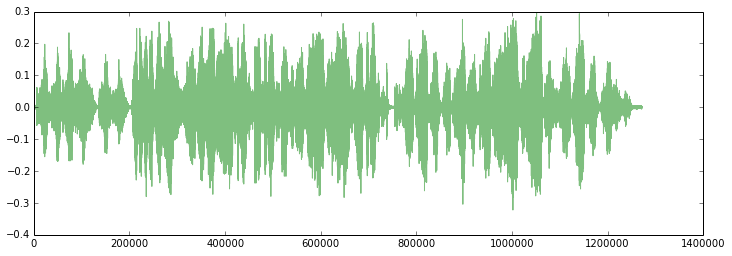

In [5]:
plt.plot(data[::44100/2100,1], 'g-', linewidth=1, alpha=0.5)

In [6]:
import numpy as np

In [7]:
music = np.zeros(2100)

sec = 15

for k in range(400,400+21*sec):
    music = np.vstack((music,np.fft.fft(data[2100*k:2100*(k+1),0])))
music = np.abs(music)
music.shape
#plt.plot(np.sqrt(a.real**2 + a.imag**2), '.')
#plt.axis("Equal")

(316, 2100)

In [8]:
music[0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

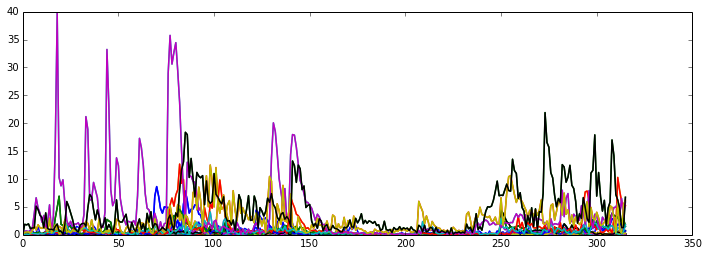

In [9]:
plt.plot(music[ :,::10 ], '-', linewidth=1.5)
plt.show()

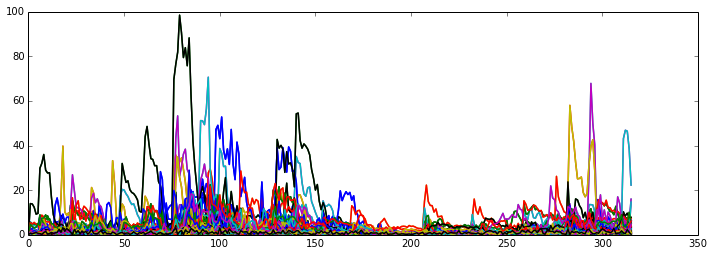

In [10]:
plt.plot(music[ :,::1 ], '-', linewidth=1.5)
plt.show()

In [20]:
rank = np.argsort(music[:, :1050], axis=1)
rank.shape

(316, 1050)

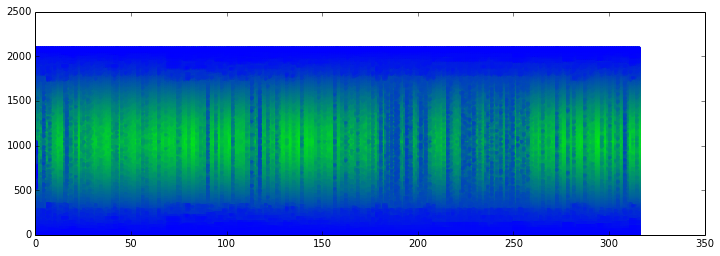

In [15]:
rank = np.argsort(music, axis=1)

for t in np.arange(2100):
    plt.plot(rank[:,t], '.', color = (0,1-1.0*t/2100,1.0*t/2100))
plt.show()

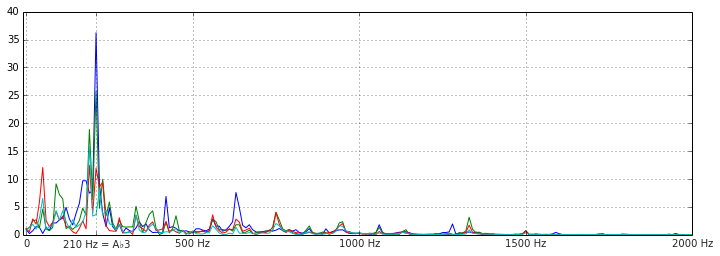

In [67]:
for t in 110 + np.arange(0,10,3):
    plt.plot(music[t])
plt.xlim([-1,200])


plt.xticks([0,21,50,100,150, 200], ['0', u'210 Hz = A♭3', '500 Hz', '1000 Hz', '1500 Hz', '2000 Hz'], color='#222222')
plt.grid(True)

In [64]:
np.argsort(music[110][:1050])[-1]*10, np.argsort(music[111][:1050])[-1]*10

(210, 190)

In [30]:
import seaborn as sns

In [48]:
pal = sns.dark_palette("palegreen", as_cmap=True)
pal

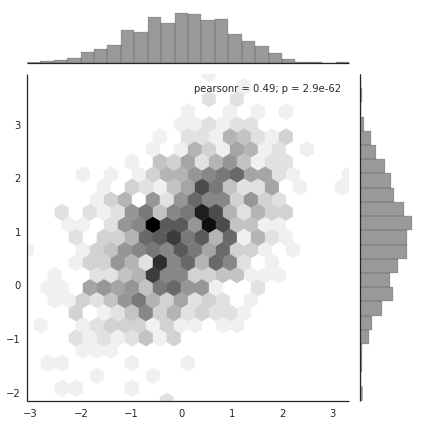

In [35]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");